In [4]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time
from citipy import citipy
from scipy.stats import linregress
from config import api_key

In [27]:
cities_csv = pd.read_csv("output_data/cities.csv")
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []

In [28]:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [29]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
cities = [city.replace("_"," ") for city in cities]
len(cities)

591

In [53]:
city_df = []
for i,city in enumerate(cities):
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
    response = requests.get(url).json()
    print(f'Processing record {i + 1} | {city}')
    if response["cod"] != "404":
        city_df.append(response)
    else:
        print(f'City not found. Skipping...')

Processing record 1 | mar del plata
Processing record 2 | tsihombe
City not found. Skipping...
Processing record 3 | kimbe
Processing record 4 | kruisfontein
Processing record 5 | busselton
Processing record 6 | bredasdorp
Processing record 7 | kaitangata
Processing record 8 | san vicente de canete
Processing record 9 | butaritari
Processing record 10 | upernavik
Processing record 11 | kamenskoye
City not found. Skipping...
Processing record 12 | geraldton
Processing record 13 | leningradskiy
Processing record 14 | punta arenas
Processing record 15 | pisco
Processing record 16 | mahebourg
Processing record 17 | taolanaro
City not found. Skipping...
Processing record 18 | arraial do cabo
Processing record 19 | avarua
Processing record 20 | sentyabrskiy
City not found. Skipping...
Processing record 21 | seoul
Processing record 22 | port elizabeth
Processing record 23 | bambous virieux
Processing record 24 | ushuaia
Processing record 25 | khatanga
Processing record 26 | grindavik
Processi

Processing record 239 | satitoa
City not found. Skipping...
Processing record 240 | provideniya
Processing record 241 | kununurra
Processing record 242 | illoqqortoormiut
City not found. Skipping...
Processing record 243 | maldonado
Processing record 244 | kaniama
Processing record 245 | tanete
Processing record 246 | oroville
Processing record 247 | adzhamka
Processing record 248 | bataipora
Processing record 249 | sorvag
City not found. Skipping...
Processing record 250 | mitsamiouli
Processing record 251 | umm durman
City not found. Skipping...
Processing record 252 | sao joao da barra
Processing record 253 | yala
Processing record 254 | berlevag
Processing record 255 | sandwick
Processing record 256 | qaanaaq
Processing record 257 | carlsbad
Processing record 258 | makakilo city
Processing record 259 | yulara
Processing record 260 | ugoofaaru
Processing record 261 | zeya
Processing record 262 | attawapiskat
City not found. Skipping...
Processing record 263 | tuktoyaktuk
Processing 

Processing record 469 | puerto madryn
Processing record 470 | thessalon
Processing record 471 | haverfordwest
Processing record 472 | mount isa
Processing record 473 | svetlaya
Processing record 474 | orangeburg
Processing record 475 | sayyan
Processing record 476 | andenes
Processing record 477 | comodoro rivadavia
Processing record 478 | tamworth
Processing record 479 | toccoa
Processing record 480 | bafq
Processing record 481 | souillac
Processing record 482 | marcona
City not found. Skipping...
Processing record 483 | hambantota
Processing record 484 | kuhdasht
Processing record 485 | maracas
Processing record 486 | dilla
Processing record 487 | durant
Processing record 488 | petropavlovsk-kamchatskiy
Processing record 489 | nemuro
Processing record 490 | manavalakurichi
Processing record 491 | brookhaven
Processing record 492 | ahipara
Processing record 493 | lompoc
Processing record 494 | sakaraha
Processing record 495 | pangody
Processing record 496 | santo antonio do ica
Proces

In [87]:
city_df = pd.DataFrame(city_df)
city_df['Lng'] = [city_df['coord'][i]['lon'] for i in range(len(city_df))]
city_df['Lat'] = [city_df['coord'][i]['lat'] for i in range(len(city_df))]
city_df['Wind_Speed'] = [city_df['wind'][i]['speed'] for i in range(len(city_df))]
city_df['Humidity'] = [city_df['main'][i]['humidity'] for i in range(len(city_df))]
city_df['Temp_Max'] = [city_df['main'][i]['temp_max'] for i in range(len(city_df))]
city_df['Cloudiness'] = [city_df['clouds'][i]['all'] for i in range(len(city_df))]
city_df['City'] = city_df['name']
city_df['Country'] = [city_df['sys'][i]['country'] for i in range(len(city_df))]
city_df['Date'] = city_df['dt']
city_df = city_df[['City','Lng','Lat','Temp_Max','Humidity','Cloudiness','Wind_Speed','Country','Date']]
city_df

,City,Lng,Lat,Temp_Max,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Mar del Plata,-57.5575,-38.0023,292.15,59,40,6.69,AR,1619288449
1,Kimbe,150.1429,-5.5502,297.05,93,65,0.62,PG,1619288229
2,Kruisfontein,24.7314,-34.0033,288.15,92,90,0.89,ZA,1619288395
3,Busselton,115.3333,-33.6500,284.26,88,0,0.83,AU,1619288149
4,Bredasdorp,20.0403,-34.5322,285.15,87,96,2.57,ZA,1619288396
...,...,...,...,...,...,...,...,...,...
545,Tam Ky,108.4833,15.5667,300.15,94,40,1.03,VN,1619288929
546,Yar-Sale,70.8333,66.8333,270.39,93,94,1.66,RU,1619288655
547,Tres Arroyos,-60.2798,-38.3739,290.37,47,15,7.67,AR,1619288930
548,Evensk,159.2333,61.9500,265.37,80,100,4.83,RU,1619288656


In [88]:
city_df.to_csv('city_data.csv')

In [5]:
city_df = pd.read_csv('city_data.csv')
city_df

,Unnamed: 0,City,Lng,Lat,Temp_Max,Humidity,Cloudiness,Wind_Speed,Country,Date
0,0,Mar del Plata,-57.5575,-38.0023,292.15,59,40,6.69,AR,1619288449
1,1,Kimbe,150.1429,-5.5502,297.05,93,65,0.62,PG,1619288229
2,2,Kruisfontein,24.7314,-34.0033,288.15,92,90,0.89,ZA,1619288395
3,3,Busselton,115.3333,-33.6500,284.26,88,0,0.83,AU,1619288149
4,4,Bredasdorp,20.0403,-34.5322,285.15,87,96,2.57,ZA,1619288396
...,...,...,...,...,...,...,...,...,...,...
545,545,Tam Ky,108.4833,15.5667,300.15,94,40,1.03,VN,1619288929
546,546,Yar-Sale,70.8333,66.8333,270.39,93,94,1.66,RU,1619288655
547,547,Tres Arroyos,-60.2798,-38.3739,290.37,47,15,7.67,AR,1619288930
548,548,Evensk,159.2333,61.9500,265.37,80,100,4.83,RU,1619288656


In [102]:
city_df[['Lng','Lat','Temp_Max','Humidity','Cloudiness','Wind_Speed','Date']].agg('describe')

,Lng,Lat,Temp_Max,Humidity,Cloudiness,Wind_Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,16.326608,20.840294,289.671073,65.667273,55.230909,3.642891,1.619289e+09
std,90.841935,32.869060,11.336581,24.191860,36.633608,2.367023,1.496202e+02
min,-179.166700,-54.800000,247.020000,5.000000,0.000000,0.220000,1.619288e+09
25%,-65.238450,-6.021300,281.752500,50.250000,20.000000,1.892500,1.619288e+09
50%,20.359000,26.013250,291.225000,70.000000,62.000000,3.110000,1.619289e+09
75%,96.955525,47.616625,299.050000,86.000000,90.000000,5.115000,1.619289e+09
max,179.316700,78.218600,310.980000,100.000000,100.000000,13.380000,1.619289e+09


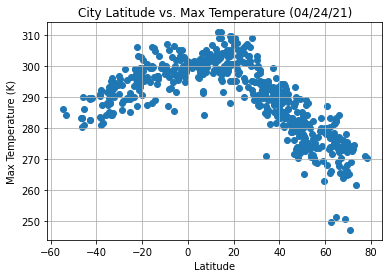

In [6]:
plt.scatter(city_df['Lat'],city_df['Temp_Max'],)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title('City Latitude vs. Max Temperature (04/24/21)')
plt.grid()
plt.savefig('output_data/lat_vs_temp.png')
plt.show()

In [ ]:
##In the above plot, the temperature in Kelvin is being shown as a function of latitude. The shape of the points indicates that
##as you move further from the equator the temperature gets lower, on average. Interstingly, it has two peaks at about 20 and 
##-10 latitude.

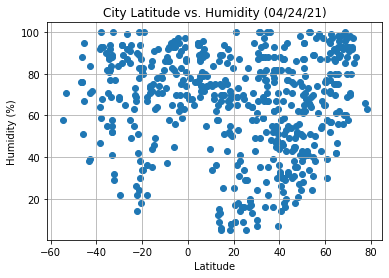

In [7]:
plt.scatter(city_df['Lat'],city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/24/21)')
plt.grid()
plt.savefig('output_data/lat_vs_humidity.png')
plt.show()

In [ ]:
##In the above plot, the humidity as a percentage is being shown as a function of latitude. At first glance, it appears as 
##though the humidity has a relatively constant max throughout the world, but a much high minimum along the equator.

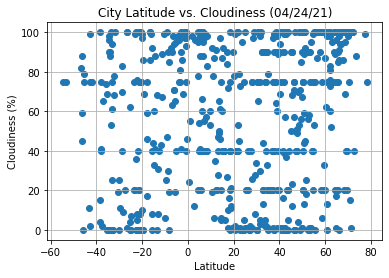

In [8]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/24/21)')
plt.grid()
plt.savefig('output_data/lat_vs_cloudiness.png')
plt.show()

In [ ]:
##In the above plot, the cloudiness as a percentage is being shown as a function of latitude. It doesn't appear as though there
##is any obvious relationship between these two things.

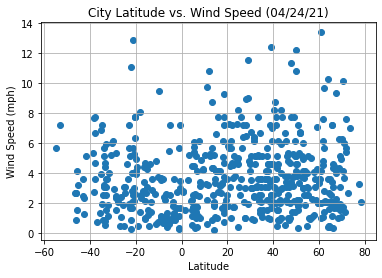

In [9]:
plt.scatter(city_df['Lat'],city_df['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (04/24/21)')
plt.grid()
plt.savefig('output_data/lat_vs_wind.png')
plt.show()

In [1]:
##In the above plot, the wind speed in miles per hour is being shown as a function of latitude. There may be a minor drop in
##average windspeed as you approach the equator, but this is far from definitive.

In [10]:
nor_hem = city_df[city_df['Lat'] > 0]
sou_hem = city_df[city_df['Lat'] < 0]

In [112]:
(m,b,r_val,p_val,std_err) = linregress(nor_hem['Lat'], nor_hem['Temp_Max'])

-0.5424322723444357

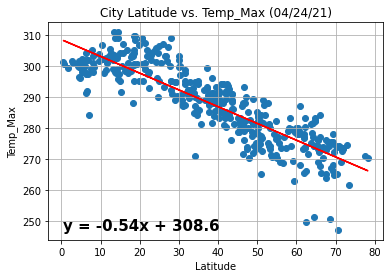

City Latitude vs. Temp_Max (04/24/21): r = -0.87


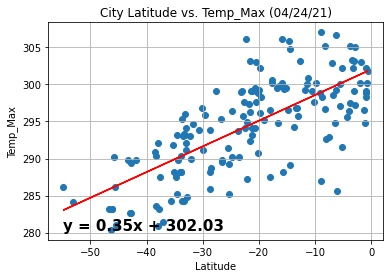

City Latitude vs. Temp_Max (04/24/21): r = 0.72


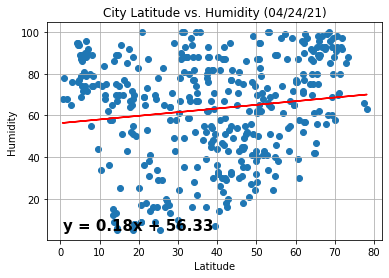

City Latitude vs. Humidity (04/24/21): r = 0.14


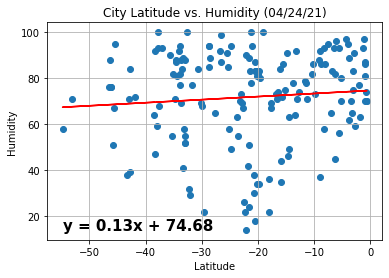

City Latitude vs. Humidity (04/24/21): r = 0.09


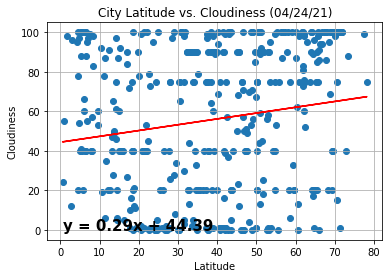

City Latitude vs. Cloudiness (04/24/21): r = 0.16


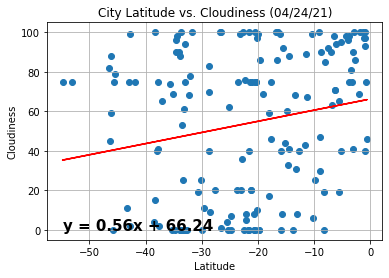

City Latitude vs. Cloudiness (04/24/21): r = 0.2


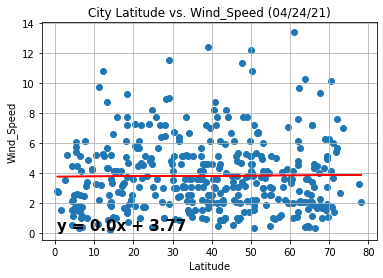

City Latitude vs. Wind_Speed (04/24/21): r = 0.01


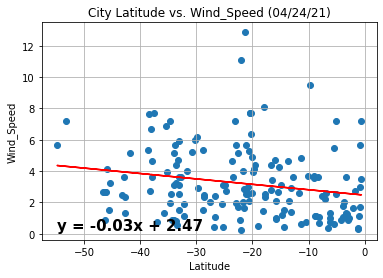

City Latitude vs. Wind_Speed (04/24/21): r = -0.2


In [11]:
hems = [nor_hem,sou_hem]
hem_str = ['nor_hem','sou_hem']
y_vals = ['Temp_Max','Humidity','Cloudiness', 'Wind_Speed']
for y in y_vals:
    for i,hem in enumerate(hems):
        (m,b,r_val,p_val,std_err) = linregress(hem['Lat'], hem[y])
        plt.scatter(hem['Lat'],hem[y],)
        plt.xlabel('Latitude')
        plt.ylabel(f'{y}')
        plt.plot(hem['Lat'], m*hem['Lat'] + b, c = 'red')
        plt.title(f'City Latitude vs. {y} (04/24/21)')
        plt.grid()
        plt.annotate(f'y = {round(m,2)}x + {round(b,2)}', (hem['Lat'].min(),hem[y].min()),fontsize=15,fontweight='bold')
        plt.savefig(f'output_data/{hem_str[i]}{y}.png')
        plt.show()
        print(f'City Latitude vs. {y} (04/24/21): r = {round(r_val,2)}')

In [ ]:
##All of the plots were generated as a nested for loop so all 4 pairs will be talked about here

##Latitude vs. Temp
##It is very clear that the Max_temp of a city is negatively correlated with its distance from the equator. The absolute 
##r-values are close to 1 and the latitude and max_temp show an obvious linear relationship.

##latitude vs. Humidity & latitude vs. cloudiness & latitude vs. Wind speed
##Because all of these show no linear trends, I will discuss them as a group. The absolute r-values for all 6 of these plots are
##very low. No obvious patterns are present. Both humidity and cloudiness have positive r-values for both of their plots, which
##would mean that as you move from the south pole to the north pole there is an increase in cloudiness and humidity, if the
##relationship is real. It would take a lot to convince me that there is some kind of linear relationship here, but based on 
##these data I don't see one for anything except max temperature.